<h1 style="color: #3636ff;">Линейная алгебра. Практическая работа №5</h1>

### Программные средства

[LaTeX. Mathematics](https://en.wikibooks.org/wiki/LaTeX/Mathematics)

[Sage. Basic Algebra and Calculus](http://doc.sagemath.org/html/en/tutorial/tour_algebra.html)

[Numpy. Quickstart tutorial](https://docs.scipy.org/doc/numpy/user/quickstart.html#linear-algebra)

[SymPy. Matrices (linear algebra)](https://docs.sympy.org/latest/modules/matrices/matrices.html)

[Quick-R. Matrix Algebra](https://www.statmethods.net/advstats/matrix.html)

[R: Solve a System of Equations](https://stat.ethz.ch/R-manual/R-devel/library/base/html/solve.html)

### Конспекты лекций

[Матрицы. Системы линейных уравнений. Алгоритм Гаусса](http://matematika.phys.msu.ru/files/a_stud_gen/246/AG-08_2009-2010.pdf)

[АЛГЕБРА И ГЕОМЕТРИЯ ДЛЯ СТУДЕНТОВ-ФИЗИКОВ](http://math.phys.msu.ru/data/24/Algebra_and_geometry.pdf)

[exponenta.ru Теоретическая справка](http://old.exponenta.ru/educat/class/courses/la/theme4/theory.asp)

# Системы линейных уравнений

## 1. Однородные и неоднородные системы.

In [1]:
%%latex
\begin{cases}
x + y - z = 0 \\
8x - y - 5z = 0 \\
-5x + y + 3z = 0 
\end{cases}

<IPython.core.display.Latex object>

In [2]:
# sage
x, y, z = var('x y z')
eq1 = x + y - z == 0
eq2 = 8 * x - y - 5 * z == 0
eq3 = -5 * x + y + 3 * z == 0
solve([eq1, eq2, eq3], x, y, z)

[[x == 2/3*r1, y == 1/3*r1, z == r1]]

In [3]:
A = matrix(3, [1,1,-1,8,-1,-5,-5,1,3])
A, A.rank(), A.det()

(
[ 1  1 -1]      
[ 8 -1 -5]      
[-5  1  3], 2, 0
)

In [4]:
%%latex
\begin{cases}
8x_1 - 5x_2 - 2x_3 - 2x_4 = 35 \\
-2x_1 + 4x_2 - 4x_3 + x_4 = -8 \\
-2x_1 + x_2 + 4x_3 + 4x_4 = -11 \\
4x_1 + x_2 + 3x_3 + 10x_4 = 10 
\end{cases}

<IPython.core.display.Latex object>

In [5]:
x1, x2, x3, x4 = var('x1 x2 x3 x4')
eq1 = 8 * x1 - 5 * x2 - 2 * x3 - 2 * x4 == 35
eq2 = -2 * x1 + 4 * x2 - 4 * x3 + x4 == -8
eq3 = -2 * x1 + x2 + 4 * x3 + 4 * x4  == -11
eq4 = 4 * x1 + x2 + 3 * x3 + 10 * x4  == 10
solve([eq1, eq2, eq3, eq4], x1, x2, x3, x4)

[[x1 == 1, x2 == -5, x3 == -3, x4 == 2]]

In [6]:
A = matrix(4, [8,-5,-2,-2,-2,4,-4,1,-2,1,4,4,4,1,3,10])
b = vector([35, -8, -11, 10])
A, b, A.rank(), A.det()

(
[ 8 -5 -2 -2]                           
[-2  4 -4  1]                           
[-2  1  4  4]                           
[ 4  1  3 10], (35, -8, -11, 10), 4, -54
)

In [7]:
x = A.solve_right(b)
x

(1, -5, -3, 2)

In [8]:
import numpy
A = numpy.array([[8,-5,-2,-2],[-2,4,-4,1],[-2,1,4,4],[4,1,3,10]])
b = numpy.array([35,-8,-11,10])

numpy.linalg.solve(A,b)

array([ 1., -5., -3.,  2.])

In [9]:
A = numpy.matrix([[8,-5,-2,-2],[-2,4,-4,1],
                  [-2,1,4,4],[4,1,3,10]])
print(A)
print(numpy.linalg.matrix_rank(A), round(numpy.linalg.det(A)))

[[ 8 -5 -2 -2]
 [-2  4 -4  1]
 [-2  1  4  4]
 [ 4  1  3 10]]
(4, -54.0)


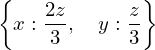

In [10]:
import sympy
sympy.init_printing(use_unicode=True)
from sympy.abc import x,y,z
system = sympy.Matrix([ [1,1,-1,0], [8,-1,-5,0], [-5,1,3,0] ])
sympy.solve_linear_system(system, x,y,z)

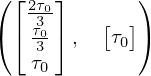

In [11]:
A = sympy.Matrix([[1,1,-1],[8,-1,-5],[-5,1,3]])
b = sympy.Matrix([0,0,0])
x = A.gauss_jordan_solve(b)
x

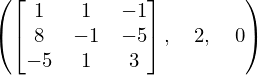

In [12]:
A = sympy.Matrix([[1,1,-1], [8,-1,-5], [-5,1,3]])
A, A.rank(), A.det()

In [13]:
from sympy.abc import a,b,c,d
system = sympy.Matrix([ [8,-5,-2,-2,35],[-2,4,-4,1,-8],
                       [-2,1,4,4,-11],[4,1,3,10,10]])
sympy.solve_linear_system(system, a,b,c,d)

Оценить время, затраченное на выполнение фрагмента программы, поможет несколько простых комманд.

In [14]:
import time
start_time = time.time()
sympy.solve_linear_system(system, a,b,c,d)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.00868701934814 seconds ---


In [15]:
%timeit sympy.solve_linear_system(system, a,b,c,d)

100 loops, best of 3: 3.4 ms per loop


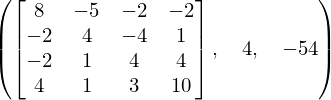

In [16]:
A = sympy.Matrix([[8,-5,-2,-2],[-2,4,-4,1],[-2,1,4,4],[4,1,3,10]])
A, A.rank(), A.det()

In [17]:
%%r
A <- matrix(data=c(8,-5,-2,-2,-2,4,-4,1,-2,1,4,4,4,1,3,10), 
            nrow=4, ncol=4, byrow=TRUE)    
b <- matrix(data=c(35,-8,-11,10), 
            nrow=4, ncol=1, byrow=FALSE)
round(solve(A, b))





     [,1]
[1,]    1
[2,]   -5
[3,]   -3
[4,]    2


In [18]:
%%r
A; det(A)
qr(A)

     [,1] [,2] [,3] [,4]
[1,]    8   -5   -2   -2
[2,]   -2    4   -4    1
[3,]   -2    1    4    4
[4,]    4    1    3   10
[1] -54
$qr
           [,1]        [,2]       [,3]       [,4]
[1,] -9.3808315  4.90361648  0.4264014 -1.4924050
[2,] -0.2132007 -4.35368183  0.2505716 -8.1122561
[3,] -0.2132007 -0.03206531 -6.6899474 -7.2749548
[4,]  0.4264014  0.75320256  0.8396846 -0.1976392

$rank
[1] 4

$qraux
[1] 1.8528029 1.6570066 1.5430743 0.1976392

$pivot
[1] 1 2 3 4

attr(,"class")
[1] "qr"


In [19]:
%%r
library(matlib)
A <- matrix(c(8,-2,-2,4,-5,4,1,1,-2,-4,4,3,-2,1,4,10), 4, 4)    
b <- c(35,-8,-11,10)
showEqn(A, b) # display equations




 8*x1 - 5*x2 - 2*x3  - 2*x4  =   35 
-2*x1 + 4*x2 - 4*x3  + 1*x4  =   -8 
-2*x1 + 1*x2 + 4*x3  + 4*x4  =  -11 
 4*x1 + 1*x2 + 3*x3 + 10*x4  =   10 


In [20]:
%%r
c( R(A), R(cbind(A,b)) ) # ranks

[1] 4 4


In [21]:
%%r
Solve(A, b)

x1        =   1 
  x2      =  -5 
    x3    =  -3 
      x4  =   2 


## 2. Правило Крамера.

In [22]:
# sage
A = matrix(4, [8,-5,-2,-2,-2,4,-4,1,-2,1,4,4,4,1,3,10])
b = vector([35,-8,-11,10])
X1 = copy(A); X2 = copy(A); X3=copy(A); X4=copy(A)
X1[:,0] = b; X2[:,1] = b ; X3[:,2] = b; X4[:,3] = b
x1 = X1.det() / A.det()
x2 = X2.det() / A.det()
x3 = X3.det() / A.det()
x4 = X4.det() / A.det()
x1, x2, x3, x4 

(1, -5, -3, 2)

In [72]:
# numpy
A = numpy.matrix([[8,-5,-2,-2],[-2,4,-4,1],[-2,1,4,4],[4,1,3,10]])
b = numpy.matrix([35,-8,-11,10]).T
print(A)
print(b)

[[ 8 -5 -2 -2]
 [-2  4 -4  1]
 [-2  1  4  4]
 [ 4  1  3 10]]
[[ 35]
 [ -8]
 [-11]
 [ 10]]


In [74]:
X1 = A.copy(); X2 = A.copy(); X3=A.copy(); X4=A.copy()
X1[:,0] = b; X2[:,1] = b ; X3[:,2] = b; X4[:,3] = b
print(X1); print(X2); print(X3); print(X4)

[[ 35  -5  -2  -2]
 [ -8   4  -4   1]
 [-11   1   4   4]
 [ 10   1   3  10]]
[[  8  35  -2  -2]
 [ -2  -8  -4   1]
 [ -2 -11   4   4]
 [  4  10   3  10]]
[[  8  -5  35  -2]
 [ -2   4  -8   1]
 [ -2   1 -11   4]
 [  4   1  10  10]]
[[  8  -5  -2  35]
 [ -2   4  -4  -8]
 [ -2   1   4 -11]
 [  4   1   3  10]]


In [75]:
numpy.linalg.det(A), numpy.linalg.det(X1), numpy.linalg.det(X2), \
numpy.linalg.det(X3), numpy.linalg.det(X4)

In [76]:
x1 = numpy.linalg.det(X1) / numpy.linalg.det(A)
x2 = numpy.linalg.det(X2) / numpy.linalg.det(A)
x3 = numpy.linalg.det(X3) / numpy.linalg.det(A)
x4 = numpy.linalg.det(X4) / numpy.linalg.det(A)
x1, x2, x3, x4 

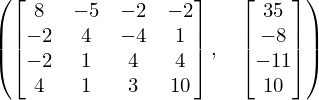

In [66]:
# sympy
A = sympy.Matrix([[8,-5,-2,-2],[-2,4,-4,1],[-2,1,4,4],[4,1,3,10]])
b = sympy.Matrix([35,-8,-11,10])
A, b

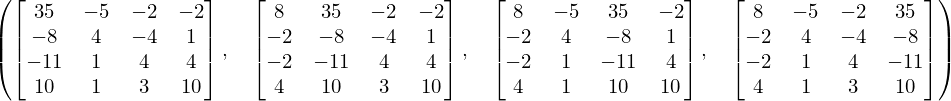

In [67]:
X1 = A.copy(); X2 = A.copy(); X3=A.copy(); X4=A.copy()
X1.col_del(0); X2.col_del(1); X3.col_del(2); X4.col_del(3)
X1 = X1.col_insert(0,b); X2 = X2.col_insert(1,b);
X3 = X3.col_insert(2,b); X4 = X4.col_insert(3,b);
X1, X2, X3, X4

In [68]:
A.det(), X1.det(), X2.det(), X3.det(), X4.det()

In [69]:
x1 = X1.det() / A.det()
x2 = X2.det() / A.det()
x3 = X3.det() / A.det()
x4 = X4.det() / A.det()
x1, x2, x3, x4 

In [83]:
%%r
A <- matrix(c(8,-2,-2,4,-5,4,1,1,-2,-4,4,3,-2,1,4,10), 4, 4)    
b <- c(35,-8,-11,10)
A; b



     [,1] [,2] [,3] [,4]
[1,]    8   -5   -2   -2
[2,]   -2    4   -4    1
[3,]   -2    1    4    4
[4,]    4    1    3   10
[1]  35  -8 -11  10


In [89]:
%%r
X1 <- A; X1[1:4,1] <- b
X2 <- A; X2[1:4,2] <- b
X3 <- A; X3[1:4,3] <- b
X4 <- A; X4[1:4,4] <- b
X1; X2; X3; X4





     [,1] [,2] [,3] [,4]
[1,]   35   -5   -2   -2
[2,]   -8    4   -4    1
[3,]  -11    1    4    4
[4,]   10    1    3   10
     [,1] [,2] [,3] [,4]
[1,]    8   35   -2   -2
[2,]   -2   -8   -4    1
[3,]   -2  -11    4    4
[4,]    4   10    3   10
     [,1] [,2] [,3] [,4]
[1,]    8   -5   35   -2
[2,]   -2    4   -8    1
[3,]   -2    1  -11    4
[4,]    4    1   10   10
     [,1] [,2] [,3] [,4]
[1,]    8   -5   -2   35
[2,]   -2    4   -4   -8
[3,]   -2    1    4  -11
[4,]    4    1    3   10


In [92]:
%%r
x1 <- det(X1) / det(A)
x2 <- det(X2) / det(A)
x3 <- det(X3) / det(A)
x4 <- det(X4) / det(A)
x1; x2; x3; x4 





[1] 1
[1] -5
[1] -3
[1] 2


## 3. Алгоритм Гаусса.
Последовательное исключение неизвестных и приведение матрицы коеффициентов уравнения к верхнему треугольному виду.

Элементарные преобразования:

1) перестановка строк;

2) удаление строк  нулевыми коэффициентами;

3) умножение любой строки на ненулевую константу;

4) прибавление к строке любой другой строки.

Шаги алгоритма:

1) выберем "разрешающую" строку с наименьшим количеством нулей, считая от начала;

2) разделим эту "разрешающую" строку на ее первый ненулевой элемент, стоящий на k-ой позиции от начала; 

3) переставим полученную строку на k-ую позицию среди строк;

4) вычтем из каждой строки матрицы "разрешающую" строку, умноженную на элемент обрабатываемой строки в k-ом столбце,

   k-ый столбец станет столбцом единичной матрицы;
   
5) продолжим процесс до того приведения матрицы к верхнему треугольному виду.

При вычислениях можно избежать дробей, применив элементарные преобразования.

In [23]:
# sage
A = matrix(4, [8,-5,-2,-2,-2,4,-4,1,-2,1,4,4,4,1,3,10])
b = vector(QQ, [35, -8, -11,10])
Ab = A.augment(b)
x = Ab.rref()[:,-1]
Ab.pivots(), Ab.rref(), x

(
              [ 1  0  0  0  1]  [ 1]
              [ 0  1  0  0 -5]  [-5]
              [ 0  0  1  0 -3]  [-3]
(0, 1, 2, 3), [ 0  0  0  1  2], [ 2]
)

In [24]:
Ab.echelon_form()

[ 2  0  0  9 20]
[ 0  1  0 10 15]
[ 0  0  1 21 39]
[ 0  0  0 27 54]

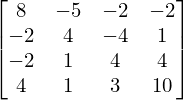

In [93]:
# sympy
A = sympy.Matrix([[8,-5,-2,-2],[-2,4,-4,1],[-2,1,4,4],[4,1,3,10]])
A

In [25]:
%%r
A <- matrix(c(8,-2,-2,4,-5,4,1,1,-2,-4,4,3,-2,1,4,10), 4, 4)    
b <- c(35,-8,-11,10)
echelon(A, b, verbose=TRUE, fractions=TRUE)




Initial matrix:
     [,1] [,2] [,3] [,4] [,5]
[1,]   8   -5   -2   -2   35 
[2,]  -2    4   -4    1   -8 
[3,]  -2    1    4    4  -11 
[4,]   4    1    3   10   10 

row: 1 

 multiply row 1 by 1/8 
     [,1] [,2] [,3] [,4] [,5]
[1,]    1 -5/8 -1/4 -1/4 35/8
[2,]   -2    4   -4    1   -8
[3,]   -2    1    4    4  -11
[4,]    4    1    3   10   10

 multiply row 1 by 2 and add to row 2 
     [,1] [,2] [,3] [,4] [,5]
[1,]    1 -5/8 -1/4 -1/4 35/8
[2,]    0 11/4 -9/2  1/2  3/4
[3,]   -2    1    4    4  -11
[4,]    4    1    3   10   10

 multiply row 1 by 2 and add to row 3 
     [,1] [,2] [,3] [,4] [,5]
[1,]    1 -5/8 -1/4 -1/4 35/8
[2,]    0 11/4 -9/2  1/2  3/4
[3,]    0 -1/4  7/2  7/2 -9/4
[4,]    4    1    3   10   10

 multiply row 1 by 4 and subtract from row 4 
     [,1]  [,2]  [,3]  [,4]  [,5] 
[1,]     1  -5/8  -1/4  -1/4  35/8
[2,]     0  11/4  -9/2   1/2   3/4
[3,]     0  -1/4   7/2   7/2  -9/4
[4,]     0   7/2     4    11 -15/2

row: 2 

 exchange rows 2 and 4 
     [,1]  